#Problem:Develop a machine leaning algorithm capable of forecasting minimum and maximum salaries for different job post
.Description of dataset:contains information for accurately predicting           minimum and maximum salary ranges for different job post
.columns:include business title,career level,salary frequency and work           location
.purpose:salary prediction
.Application:Human resources and recruitment(competitive compensation             packages,budget planning,retention strategy of employees),analyzing             market trends,employee performance and incentives.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis


import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [3]:
#Load the dataset
salary_range = pd.read_csv('./Jobs_NYC_Postings.csv')

Data Preprocessing and Exploratory Data Analysis

In [4]:
# gives complete information about first 5 rows.
salary_range.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [5]:
#gives row and column number
salary_range.shape

(5120, 30)

In [6]:
salary_range.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,NaN
min,469953.000000,1.000000,0.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,NaN


In [7]:
#Making a copy of it
salary_ranges = salary_range.copy(deep = True)
salary_ranges.shape
salary_ranges.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [8]:
#checking for duplicates
salary_ranges.duplicated().sum()

19

In [9]:
#dropping the columns with duplicate values
salary_ranges = salary_ranges.drop_duplicates()

In [10]:
#again checking for duplicates
salary_ranges.duplicated().sum()

0

In [11]:
#to get the column names
salary_ranges.columns.values

array(['Job ID', 'Agency', 'Posting Type', '# Of Positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Work Location 1', 'Recruitment Contact', 'Residency Requirement',
       'Posting Date', 'Post Until', 'Posting Updated', 'Process Date'],
      dtype=object)

In [12]:
#To drop unnecessary columns
salary_ranges = salary_ranges.drop(['Agency','Posting Type','# Of Positions','Title Classification','Title Code No','Job Description','Division/Work Unit',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Work Location 1', 'Recruitment Contact', 'Residency Requirement',
       'Posting Date', 'Post Until', 'Posting Updated', 'Process Date'],axis=1)

In [13]:
#checking missing values
salary_ranges.isnull().sum()

Job ID                             0
Business Title                     0
Civil Service Title                0
Level                              0
Job Category                       0
Full-Time/Part-Time indicator    116
Career Level                       0
Salary Range From                  0
Salary Range To                    0
Salary Frequency                   0
Work Location                      0
dtype: int64

In [14]:
#filling missing column with mode
categoricals1 = ['Full-Time/Part-Time indicator']

for column in categoricals1:
    # Fill with the most frequent value (mode)
    salary_ranges[column] = salary_ranges[column].fillna(salary_ranges[column].mode()[0])

In [15]:
#again checking missing values
salary_ranges.isnull().sum()

Job ID                           0
Business Title                   0
Civil Service Title              0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
dtype: int64

In [16]:
#Display concise summary of it
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5101 entries, 0 to 5119
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5101 non-null   int64  
 1   Business Title                 5101 non-null   object 
 2   Civil Service Title            5101 non-null   object 
 3   Level                          5101 non-null   object 
 4   Job Category                   5101 non-null   object 
 5   Full-Time/Part-Time indicator  5101 non-null   object 
 6   Career Level                   5101 non-null   object 
 7   Salary Range From              5101 non-null   float64
 8   Salary Range To                5101 non-null   float64
 9   Salary Frequency               5101 non-null   object 
 10  Work Location                  5101 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 478.2+ KB


In [17]:
#mentioning only categorical columns
category=['Business Title','Civil Service Title','Level','Job Category','Full-Time/Part-Time indicator','Career Level','Salary Frequency','Work Location']


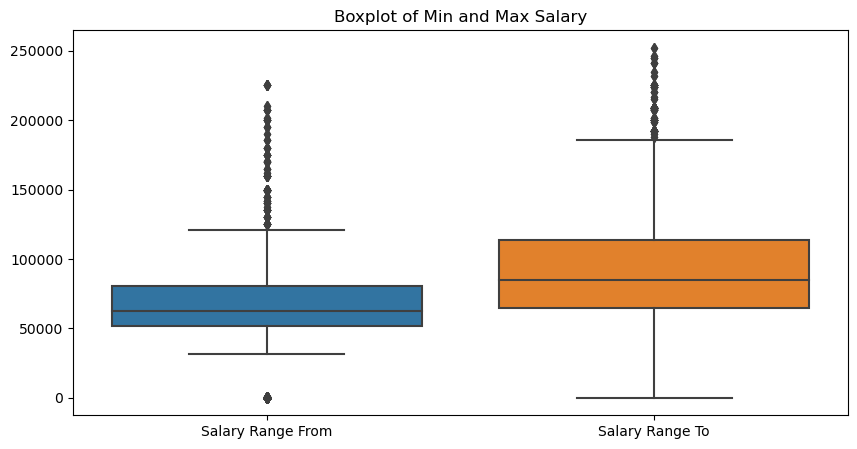

In [18]:
#checking for outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=salary_ranges[['Salary Range From', 'Salary Range To']])
plt.title('Boxplot of Min and Max Salary')
plt.show()


In [19]:
#for getting unique values in each column
salary_ranges.nunique()

Job ID                           2626
Business Title                   1781
Civil Service Title               365
Level                              18
Job Category                      183
Full-Time/Part-Time indicator       2
Career Level                        5
Salary Range From                 559
Salary Range To                   748
Salary Frequency                    3
Work Location                     293
dtype: int64

In [20]:
print(salary_ranges['Business Title'].value_counts())
print(salary_ranges['Civil Service Title'].value_counts())

Business Title
Project Manager                                            63
CASE MANAGEMENT SUPERVISOR                                 62
ACCOUNTABLE MANAGER                                        58
Deputy Director                                            38
CASE MANAGEMENT TEAM LEADER                                36
                                                           ..
Claims Specialist, Level III â Real Property Division     1
Chief Inspector                                             1
Configuration Specialist                                    1
Deputy ACCO                                                 1
ETL/Data warehouse Developer                                1
Name: count, Length: 1781, dtype: int64
Civil Service Title
COMMUNITY COORDINATOR               269
CITY RESEARCH SCIENTIST             236
PRINCIPAL ADMINISTRATIVE ASSOC      183
COMMUNITY ASSOCIATE                 180
ADMINISTRATIVE STAFF ANALYST (      148
                                   ... 
ASS

In [21]:
print(salary_ranges['Level'].value_counts())
print(salary_ranges['Job Category'].value_counts())

Level
00    2099
02     997
01     749
03     578
M4     171
M2     124
04      93
M1      92
M3      89
M5      28
4A      24
M6      24
M7      10
MY       8
4B       4
M8       4
1B       4
3A       3
Name: count, dtype: int64
Job Category
Engineering, Architecture, & Planning                                                                                                                                                             782
Social Services                                                                                                                                                                                   351
Technology, Data & Innovation                                                                                                                                                                     347
Finance, Accounting, & Procurement                                                                                                                                 

In [22]:
print(salary_ranges['Full-Time/Part-Time indicator'].value_counts())
print(salary_ranges['Career Level'].value_counts())

Full-Time/Part-Time indicator
F    4939
P     162
Name: count, dtype: int64
Career Level
Experienced (non-manager)    3831
Manager                       583
Entry-Level                   455
Student                       134
Executive                      98
Name: count, dtype: int64


In [23]:
print(salary_ranges['Salary Frequency'].value_counts())
print(salary_ranges['Work Location'].value_counts())

Salary Frequency
Annual    4667
Hourly     384
Daily       50
Name: count, dtype: int64
Work Location
30-30 Thomson Ave L I City Qns    434
96-05 Horace Harding Expway       399
55 Water St Ny Ny                 370
42-09 28th Street                 319
59-17 Junction Blvd Corona Ny     273
                                 ... 
Forest Pk 80-30 Park Lane Quee      1
Bronx Hdqt., 1 Bx Rvr Pkwy., B      1
24 West 61 Street                   1
2 Metro Tech                        1
Office of Emergency Management      1
Name: count, Length: 293, dtype: int64


INSIGHTS:

Minimum and maximum salary varies widely with different job title,experience and work location.

Observed the presence of missing values and outliers.

Maximum salary is found to be two lakh fifty thousand.

Exploratory Data Analysis

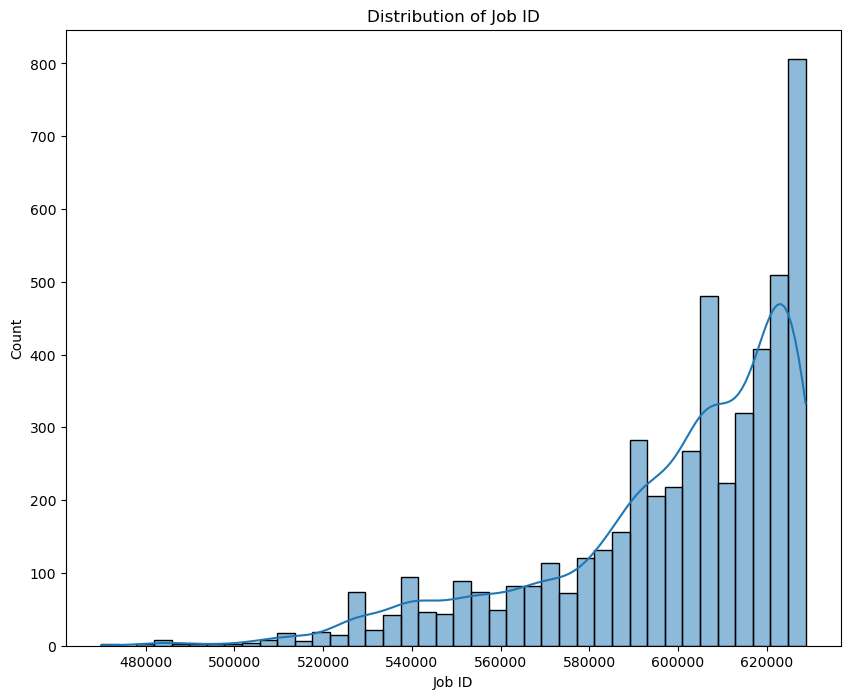

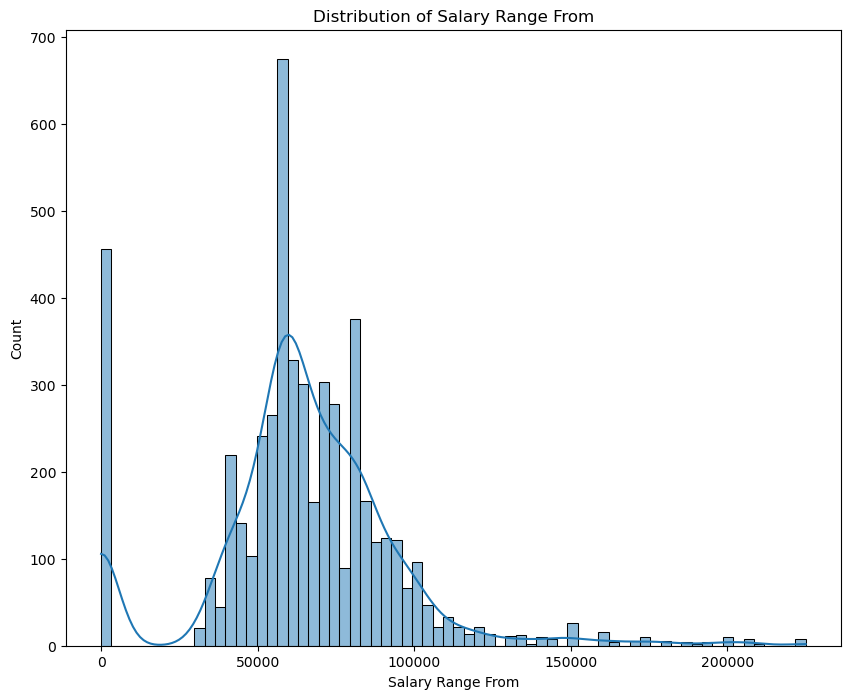

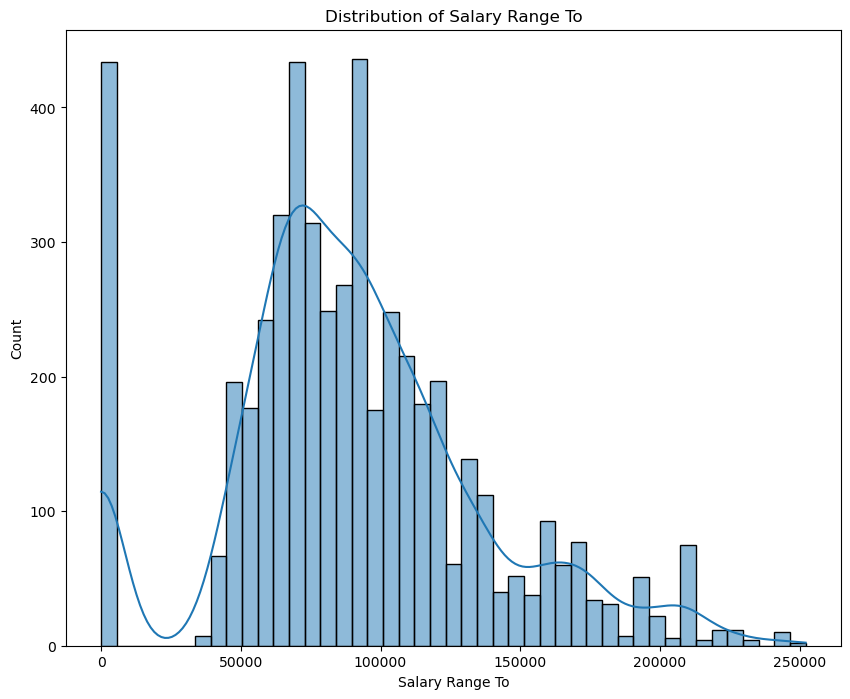

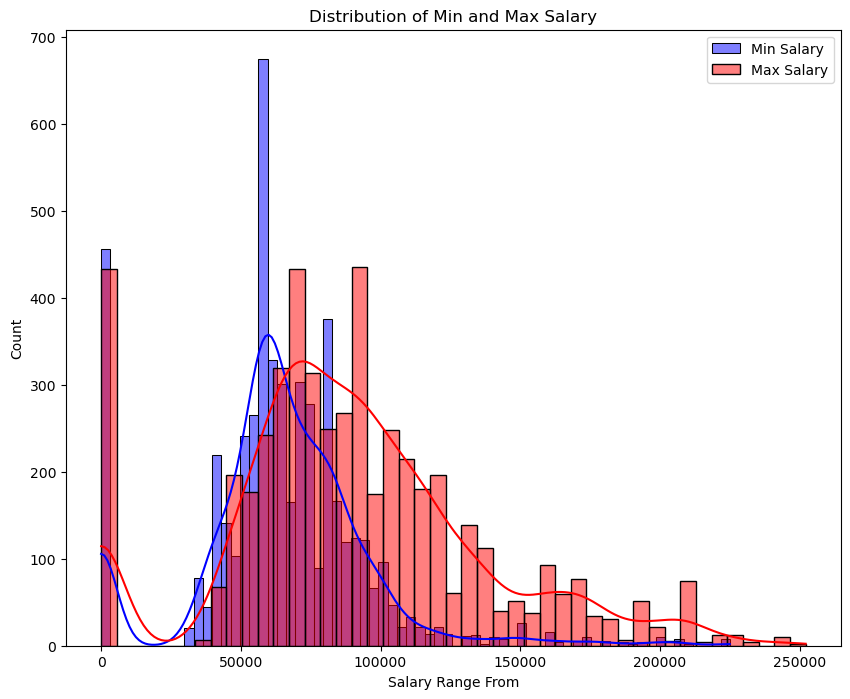

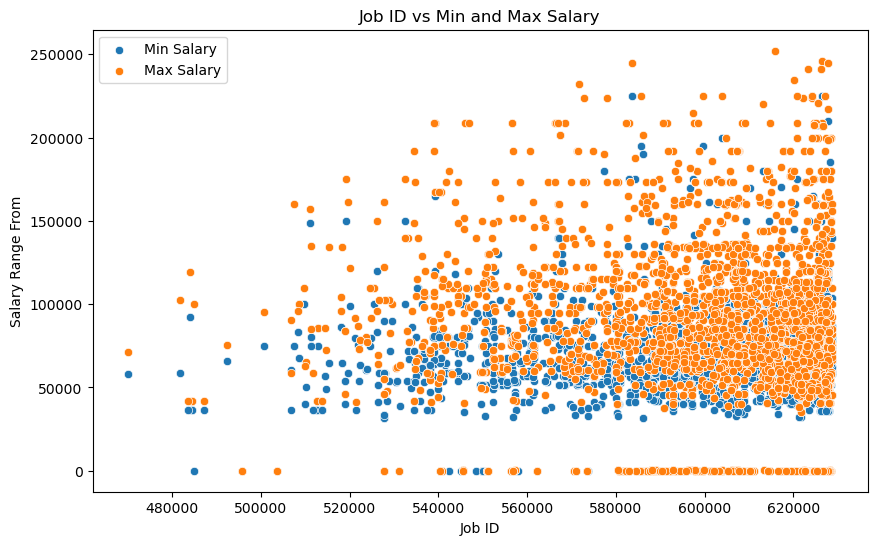

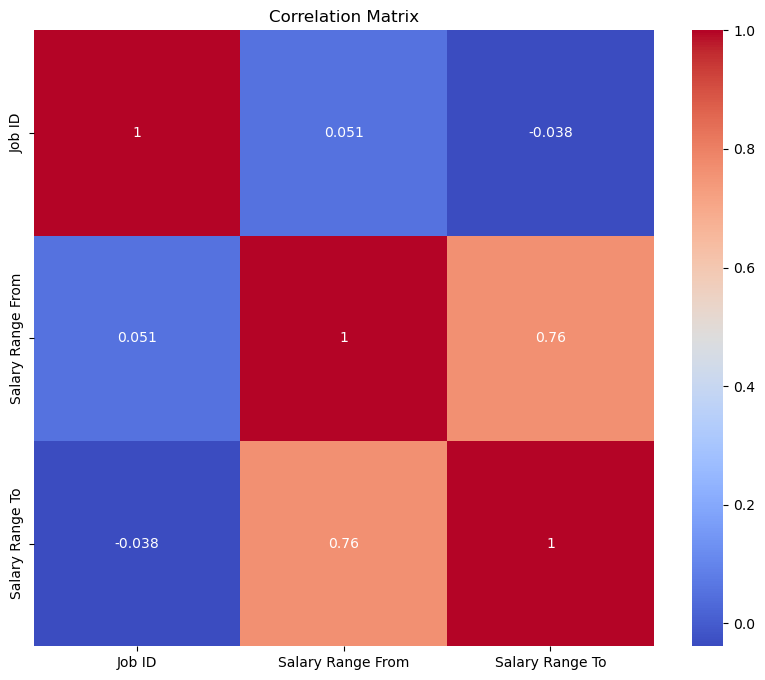

In [24]:
# Data Visualization
# Univariate Analysis
# Visualize the distribution of each numerical feature
numerical_features = salary_ranges.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 8))
    sns.histplot(salary_ranges[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize the distribution of the target variables (minimum and maximum salary)
plt.figure(figsize=(10, 8))
sns.histplot(salary_ranges['Salary Range From'], kde=True, color='blue', label='Min Salary')
sns.histplot(salary_ranges['Salary Range To'], kde=True, color='red', label='Max Salary')
plt.title('Distribution of Min and Max Salary')
plt.legend()
plt.show()

# Bivariate Analysis
# Analyze the relationship between each feature and the target variables
for feature in numerical_features:
    if feature not in ['Salary Range From', 'Salary Range To']:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=salary_ranges[feature], y=salary_ranges['Salary Range From'], label='Min Salary')
        sns.scatterplot(x=salary_ranges[feature], y=salary_ranges['Salary Range To'], label='Max Salary')
        plt.title(f'{feature} vs Min and Max Salary')
        plt.legend()
        plt.show()

# Select only numerical columns for correlation calculation
numerical_salary_range1 = salary_ranges.select_dtypes(include=['number'])

# Calculate and visualize the correlation matrix
corr_matrix = numerical_salary_range1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [25]:
#checking for skewness and kurtosis
salary_data = salary_ranges['Salary Range To']
salary_skewness = skew(salary_data)
salary_kurtosis = kurtosis(salary_data)

print(f'Skewness of salary: {salary_skewness}')
print(f'Kurtosis of salary: {salary_kurtosis}')

Skewness of salary: 0.37368592948734675
Kurtosis of salary: 0.6130769787256294


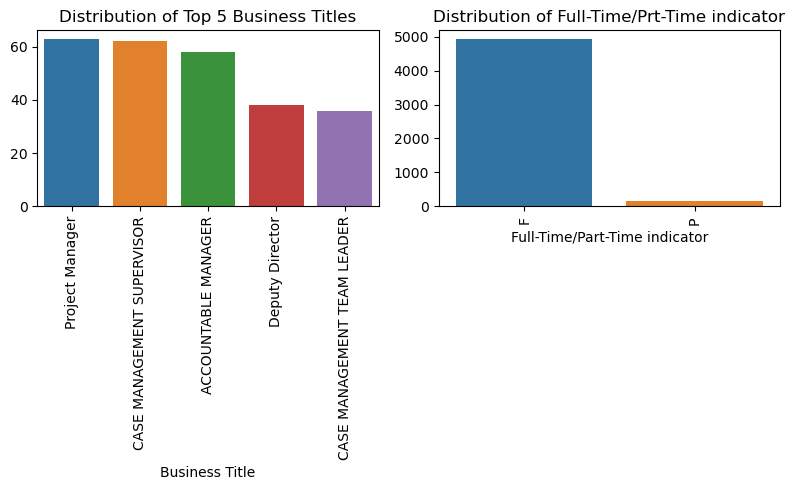

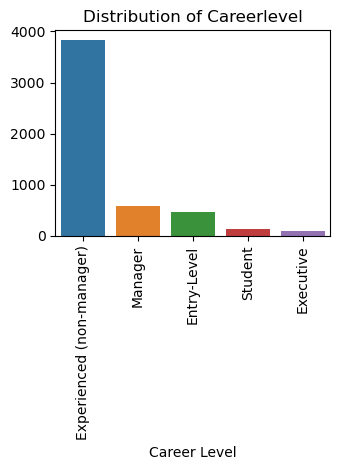

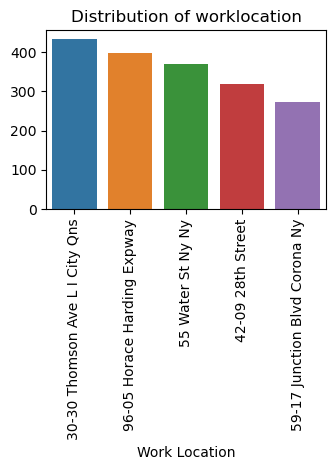

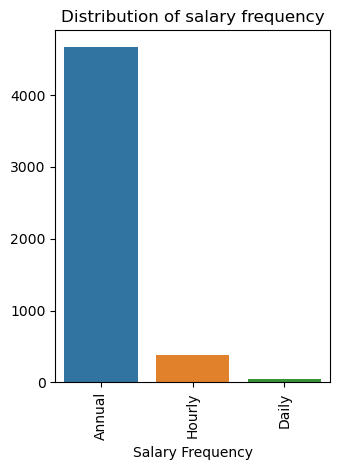

In [26]:
# Histogram for salary columns
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
# Count the occurrences of each business title and select the top 5
business_title_counts = salary_ranges['Business Title'].value_counts()[:5]
# Plot the bar chart for the top 5 business titles
sns.barplot(x=business_title_counts.index, y=business_title_counts.values)
plt.title('Distribution of Top 5 Business Titles')
plt.xticks(rotation=90) # Rotate x-axis labels for readability

plt.subplot(1, 2, 2)
FP_counts = salary_ranges['Full-Time/Part-Time indicator'].value_counts()[:5]
sns.barplot(x=FP_counts.index, y=FP_counts.values)
plt.title('Distribution of Full-Time/Prt-Time indicator')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout for better spacing
plt.show()

plt.subplot(1, 2, 2)
careerlevel_counts = salary_ranges['Career Level'].value_counts()[:5]
sns.barplot(x=careerlevel_counts.index, y=careerlevel_counts.values)
plt.title('Distribution of Careerlevel')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout for better spacing
plt.show()

plt.subplot(1, 2, 2)
worklocation_counts = salary_ranges['Work Location'].value_counts()[:5]
sns.barplot(x=worklocation_counts.index, y=worklocation_counts.values)
plt.title('Distribution of worklocation')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout for better spacing
plt.show()

plt.subplot(1, 2, 2)
salaryfrequency_counts = salary_ranges['Salary Frequency'].value_counts()[:5]
sns.barplot(x= salaryfrequency_counts.index, y=salaryfrequency_counts.values)
plt.title('Distribution of salary frequency')
plt.xticks(rotation=90)

plt.tight_layout() # Adjust layout for better spacing
plt.show()




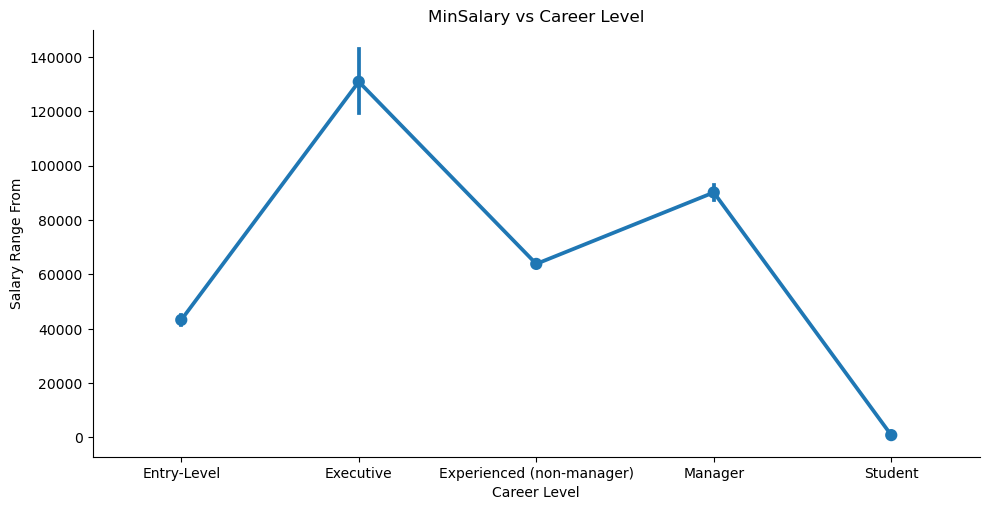

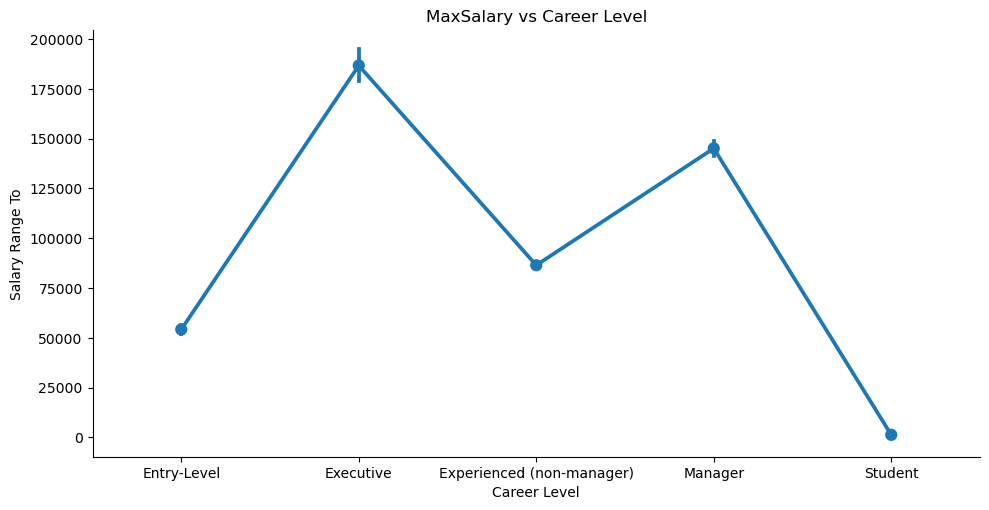

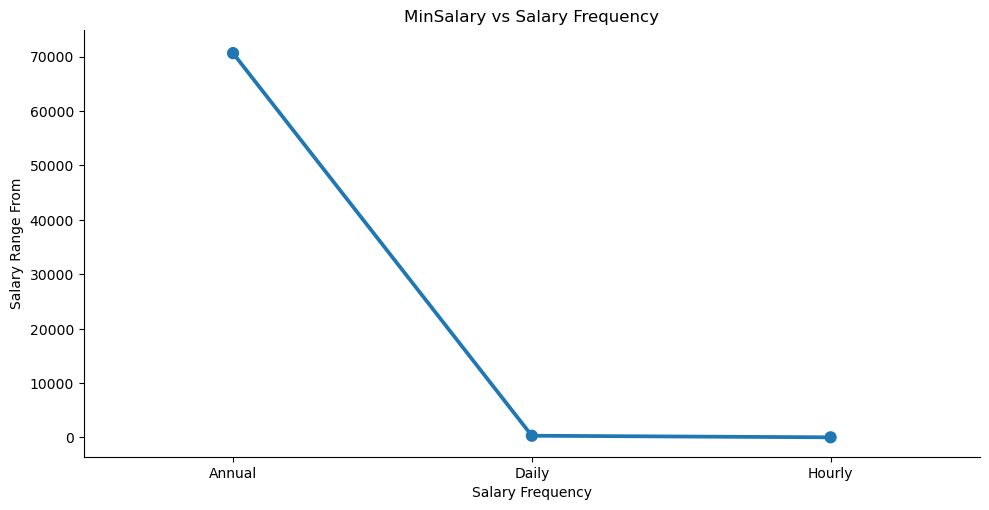

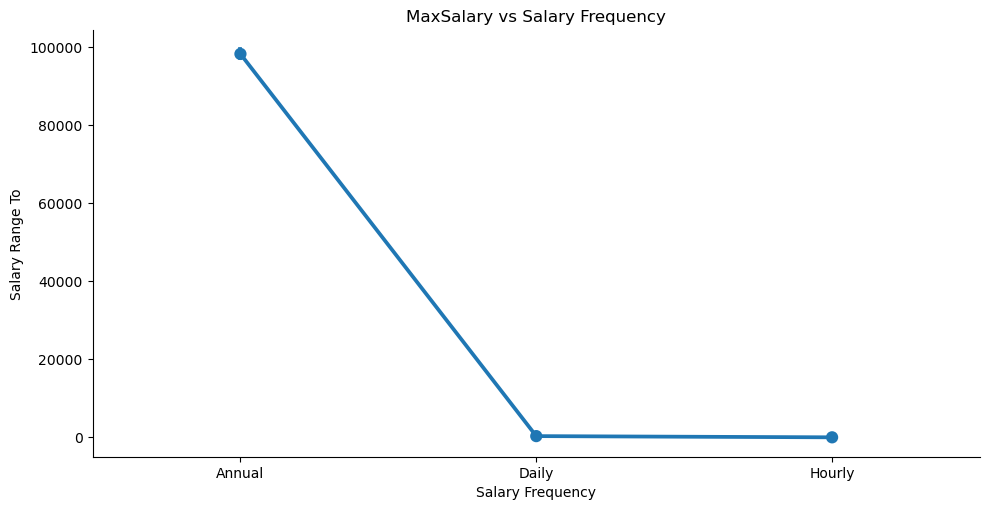

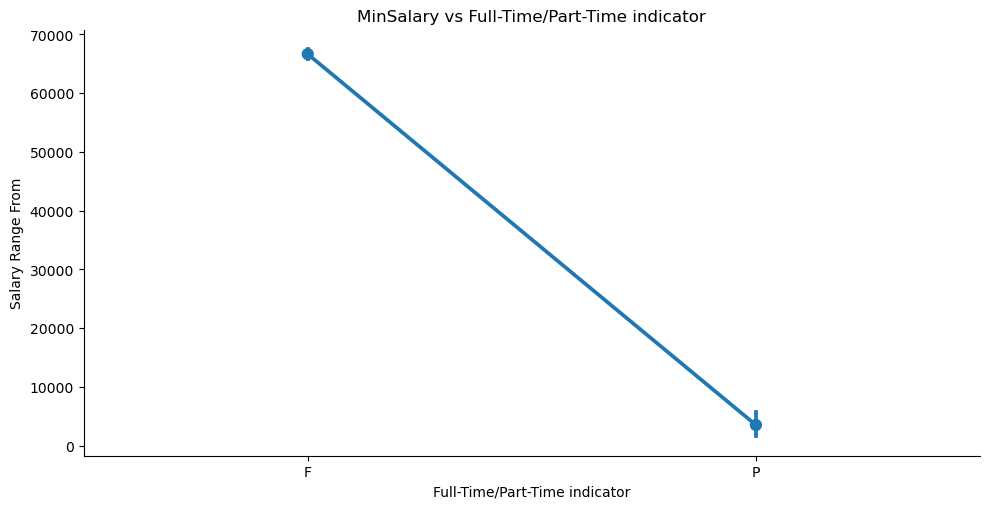

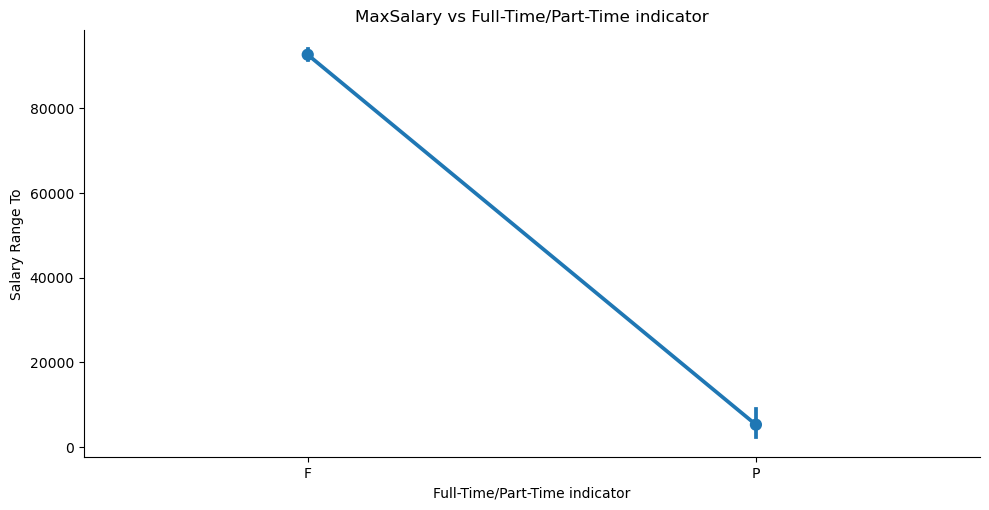

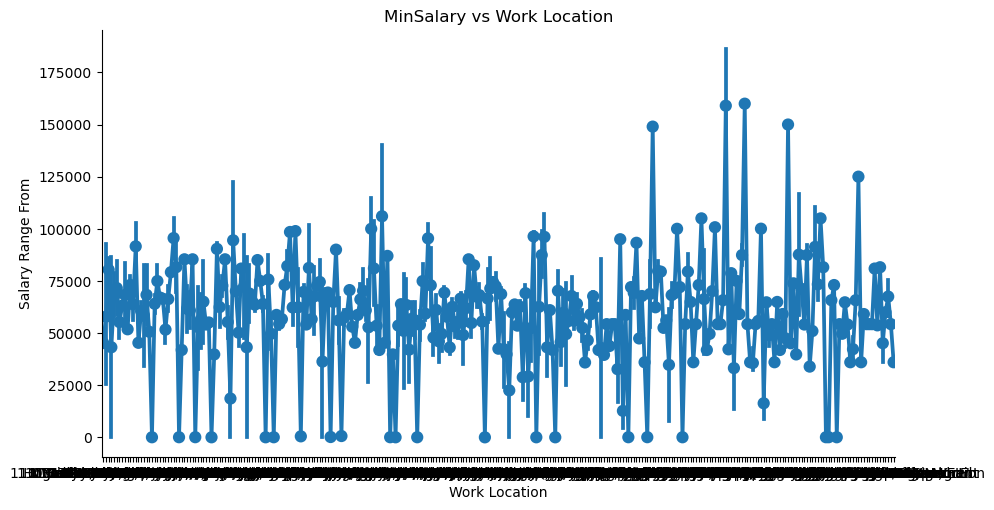

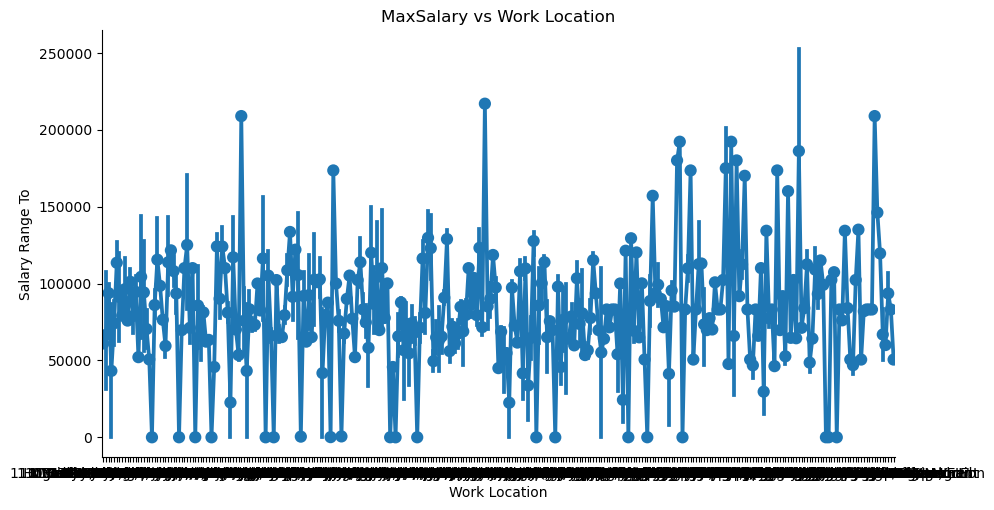

In [27]:
# Select the first 4 categorical columns
categorical_columns = ['Career Level','Salary Frequency','Full-Time/Part-Time indicator','Work Location'][:5]

# Convert these columns to category dtype
salary_ranges[categorical_columns] = salary_ranges[categorical_columns].astype('category')

# Create pair plots for MinSalary and MaxSalary against the first 5 categorical variables
for col in categorical_columns:
    sns.catplot(x=col, y='Salary Range From', data=salary_ranges, kind='point', aspect=2)
    plt.title(f'MinSalary vs {col}')
    plt.show()

    sns.catplot(x=col, y='Salary Range To', data=salary_ranges, kind='point', aspect=2)
    plt.title(f'MaxSalary vs {col}')
    plt.show()

In [28]:
#categorical encoding
# Initialize LabelEncoder
le = LabelEncoder()

# List of the 8 categorical columns to be encoded
categorical_cols = ['Business Title','Civil Service Title','Level','Job Category','Full-Time/Part-Time indicator','Career Level','Salary Frequency','Work Location']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    salary_ranges[col] = le.fit_transform(salary_ranges[col])

print(salary_ranges)

      Job ID  Business Title  Civil Service Title  Level  Job Category  \
0     623668            1431                  136      2           105   
1     608193             657                   36      0           167   
2     625094            1592                   36      0           123   
3     580593            1288                  282      2           135   
4     624937             681                  136      3           105   
...      ...             ...                  ...    ...           ...   
5115  570670            1377                  297      3           102   
5116  552517             855                  141      2           123   
5117  567353             149                  218     12           169   
5118  612424            1002                  151      0           104   
5119  589902             697                   62      0           123   

      Full-Time/Part-Time indicator  Career Level  Salary Range From  \
0                                 0    

In [29]:
salary_ranges.shape

(5101, 11)

In [30]:
salary_ranges.head()

,Job ID,Business Title,Civil Service Title,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location
0,623668,1431,136,2,105,0,2,82506.0,94882.0,0,132
1,608193,657,36,0,167,0,2,58682.0,134570.0,0,110
2,625094,1592,36,0,123,0,2,58682.0,91405.0,0,110
3,580593,1288,282,2,135,0,2,50972.0,82730.0,0,151
4,624937,681,136,3,105,0,2,92301.0,106146.0,0,132


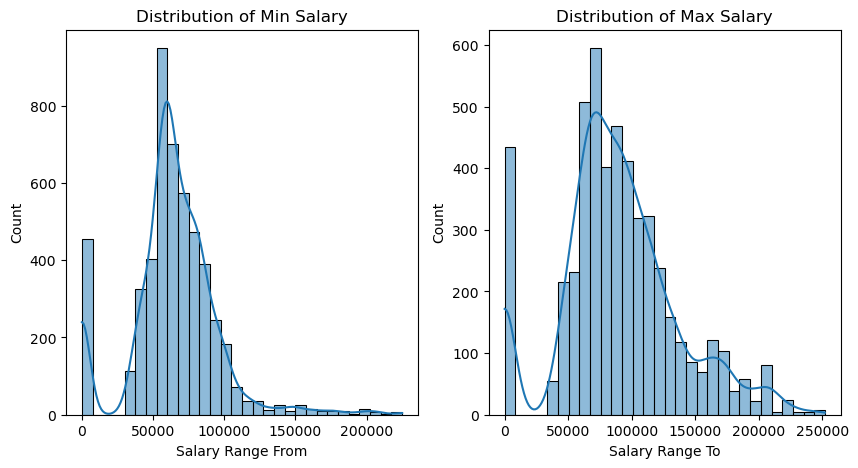

In [31]:
# Histogram for salary columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(salary_ranges['Salary Range From'], kde=True, bins=30)
plt.title('Distribution of Min Salary')

plt.subplot(1, 2, 2)
sns.histplot(salary_ranges['Salary Range To'], kde=True, bins=30)
plt.title('Distribution of Max Salary')
plt.show()

Brief:Investigated the relationship between salary range and various features such as job title,career level,salary frequency,work location etc. 

Key findings;salary range increases with higher career or experience level.

salary range for different job post also varies with location.

Minimum and maximum salary for different job post are different.

salary range also varies with salary frequency,full time or part time job.

Predictive modeling - ML Algorithm

Linear Regression,
Random Forest Regressor,
Gradient Boosting Regressor

In [32]:
#defining x and y axis
target_min = ['Salary Range From']
target_max = ['Salary Range To']

x = salary_ranges.drop(['Salary Range From','Salary Range To'],axis = 1)
y_min = salary_ranges[target_min]
y_max = salary_ranges[target_max]


In [33]:
#split data into training and testing sets

x_train,x_test,y_min_train,y_min_test,y_max_train,y_max_test = train_test_split(x,y_min,y_max,test_size = 0.2,random_state = 46)

1.Linear Regression

In [34]:
#initialize and fit model
model1 = LinearRegression()
model1.fit(x_train,y_min_train)
model1_max = LinearRegression()
model1_max.fit(x_train,y_max_train)

LinearRegression()

In [35]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print(f"Mean squared error:{mse:.2f}")
    print(f"Mean absolute error:{mae:.2f}")
    print(f"R2 score:{r2:.2f}\n")

In [36]:
#evaluation metrics
evaluate_model(model1,x_train,y_min_train, x_test,y_min_test)
evaluate_model(model1_max,x_train, y_max_train, x_test,y_max_test) 

Mean squared error:564791310.94
Mean absolute error:15640.12
R2 score:0.53

Mean squared error:900501006.71
Mean absolute error:21962.35
R2 score:0.63



2,Random Forest Regressor

In [37]:
#initialize and fit models
model2 = RandomForestRegressor(random_state = 43)
model2.fit(x_train,y_min_train)
model2_max = RandomForestRegressor(random_state = 43)
model2_max.fit(x_train,y_max_train)

RandomForestRegressor(random_state=43)

In [38]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print(f"Mean squared error:{mse:.2f}")
    print(f"Mean absolute error:{mae:.2f}")
    print(f"R2 score:{r2:.2f}\n")

In [39]:
#evaluation metrics
evaluate_model(model2,x_train,y_min_train,x_test,y_min_test)
evaluate_model(model2_max,x_train, y_max_train, x_test,y_max_test)

Mean squared error:63970879.10
Mean absolute error:3578.02
R2 score:0.95

Mean squared error:78500086.79
Mean absolute error:4811.19
R2 score:0.97



In [40]:
#Cross validation score
model2 = RandomForestRegressor(random_state = 43)
k = 5
# Use the full training set y_min instead of the test set y_min_test
cv_scores = cross_val_score(model2, x, y_min, cv=k)

print(f"Cross-Validation Scores (K={k}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores (K=5): [0.95157021 0.94792018 0.90238008 0.93146423 0.93656707]
Mean Accuracy: 0.93
Standard Deviation: 0.02


3,Gradient Boosting Regressor

In [41]:
#initialize and fit model
model3 = GradientBoostingRegressor(random_state = 43)
model3.fit(x_train,y_min_train)
model3_max = GradientBoostingRegressor(random_state = 43)
model3_max.fit(x_train,y_max_train)

GradientBoostingRegressor(random_state=43)

In [42]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print(f"Mean squared error:{mse:.2f}")
    print(f"Mean absolute error:{mae:.2f}")
    print(f"R2 score:{r2:.2f}\n")

In [43]:
#evaluation metrics
evaluate_model(model3,x_train,y_min_train,x_test,y_min_test)
evaluate_model(model3_max,x_train, y_max_train, x_test,y_max_test)

Mean squared error:255677180.67
Mean absolute error:9802.20
R2 score:0.79

Mean squared error:332852042.77
Mean absolute error:13112.15
R2 score:0.86



In [44]:
#cross validation score
model3 = GradientBoostingRegressor(random_state = 43)
k = 5
# Use the full training set y_min instead of the test set y_min_test
cv_scores = cross_val_score(model2, x, y_min, cv=k)

print(f"Cross-Validation Scores (K={k}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores (K=5): [0.95157021 0.94792018 0.90238008 0.93146423 0.93656707]
Mean Accuracy: 0.93
Standard Deviation: 0.02


INTERPRETATION

- Among the three models,Random Forest Regressor is the better model with low mean absolute error and
   good r2 score of 0.97.
- Mean accuracy is found to be 0.93